# cSIM speckle processing code

In [1]:
# Import packages

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift


from IPython import display
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use(['dark_background'])


In [2]:
# Arrayfire implementation

import arrayfire as af
from cSIM_func_af import *

af.set_backend('cuda')
af.set_device(2)
af.device_info()

### If no arrayfire / llops, please import the following instead:
# from cSIM_func import *

{'device': 'GeForce_GTX_1080_Ti',
 'backend': 'CUDA',
 'toolkit': 'v8',
 'compute': '6.1'}

In [3]:
### simulation data
f = open('coherent_data.pckl', 'rb')
pscrop,lambda_c,NA_obj,z_camera,Ic_image,upsamp_factor,\
bg = pickle.load(f)
f.close()

In [4]:
# Upsampling image

Ic_image_up = image_upsampling(Ic_image, upsamp_factor, bg)


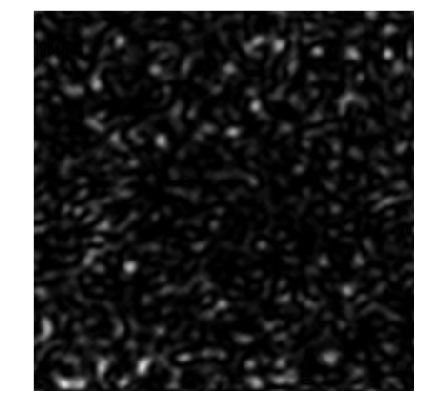

In [5]:
display_image_movie(Ic_image_up[0], frame_num=40, size=(7,7), pause_time=0.0001)

Text(0,0.5,'yshift (px)')

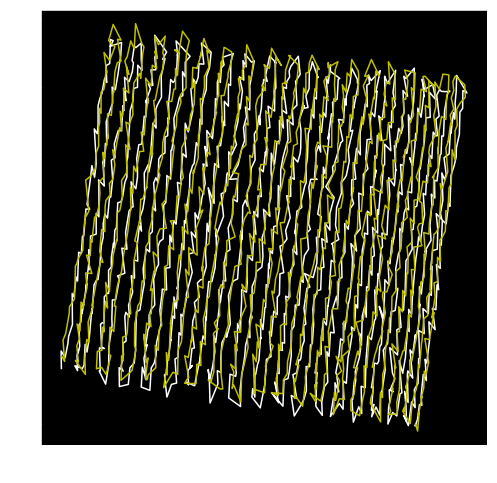

In [6]:
# Image registration to get shift
xshift, yshift = image_registration(Ic_image, 100, upsamp_factor)

plt.figure(figsize=(8,8))
plt.plot(xshift[0],yshift[0],'w')
plt.plot(xshift[1],yshift[1],'y')
plt.axis('equal')
plt.xlabel('xshift (px)')
plt.ylabel('yshift (px)')

In [7]:
# Initialize the solver object

cSIM_sol = cSIM_solver(Ic_image_up, xshift, yshift, 80, lambda_c,\
                       pscrop, z_camera, upsamp_factor, NA_obj, 0.3, 0.95, 20)


|  20  |  9.38e+07  |   677.25   |


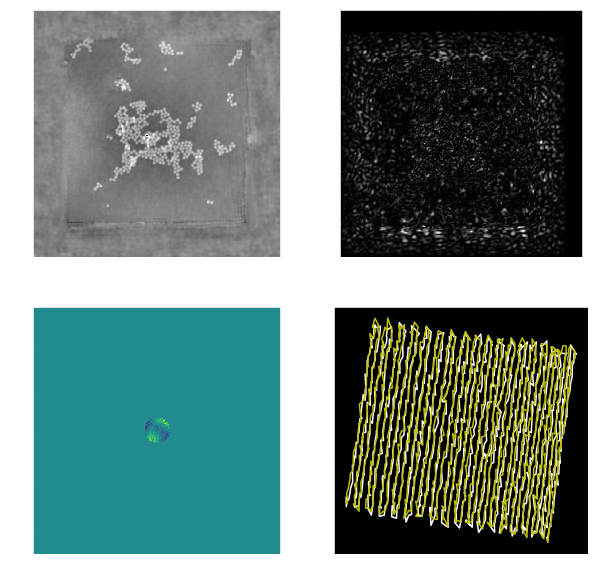

In [8]:

cSIM_sol.iterative_algorithm(Ic_image_up, 1, 1, 1, 1/5, figsize=(10,10))

